In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns',None)

In [11]:
df=pd.read_csv('gurgaon_properties_4csv').drop_duplicates()

In [12]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,flat,pyramid elite,Sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,1,15
3,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174


In [13]:
df.shape

(3832, 23)

In [14]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'pooja room', 'store room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

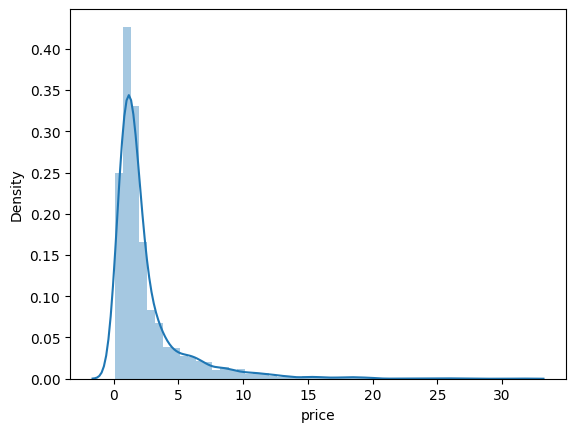

In [19]:
sns.distplot(df['price'])

<Axes: xlabel='price'>

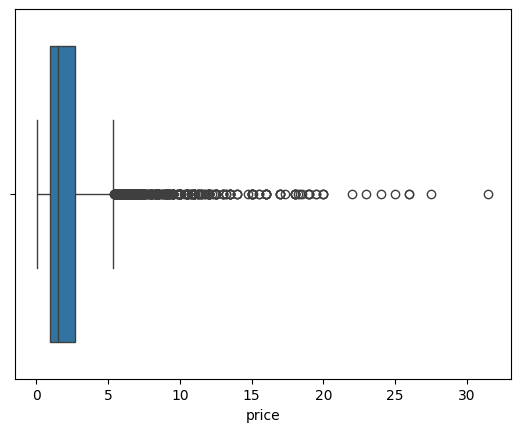

In [21]:
sns.boxplot(x=df['price'])

In [25]:
# calculate iqr for price
q1= df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr= q3-q1

# define bounda for outliers
lower_bound= q1 -1.5 * iqr
upper_bound =q3 + 1.5 * iqr
# identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price']> upper_bound)]
# displaying  the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats


(439,
 count    439.000000
 mean       9.164556
 std        4.049009
 min        5.400000
 25%        6.350000
 50%        8.000000
 75%       10.550000
 max       31.500000
 Name: price, dtype: float64)

In [26]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
856,house,arjun marg/ sector- 26 phase- 1/ golf course road,DLF Phase 1,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
2948,house,independent,Sushant Lok Phase 1,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,2,42
2586,house,dlf city plots,DLF Phase 1,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,new property,NaN,4545.0,NaN,1,1,1,0,1,2,138
2301,house,independent,DLF Phase 1,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,new property,NaN,400.0,350.0,1,1,1,1,0,2,72
1752,house,suncity township,Sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
3170,house,emaar the palm springs,Sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,1,0,0,2,122
2877,house,independent,DLF Phase 1,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
2773,house,vipul tatvam villa,Sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
742,house,independent,DLF Phase 1,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,1,0,0,0,97
910,house,dlf city plots,DLF Phase 1,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,new property,NaN,4518.0,NaN,1,1,1,1,0,2,153


#### one the basis of price we can say that there are some genuine outliers but there are some data error as wel

# price_per_sqft

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

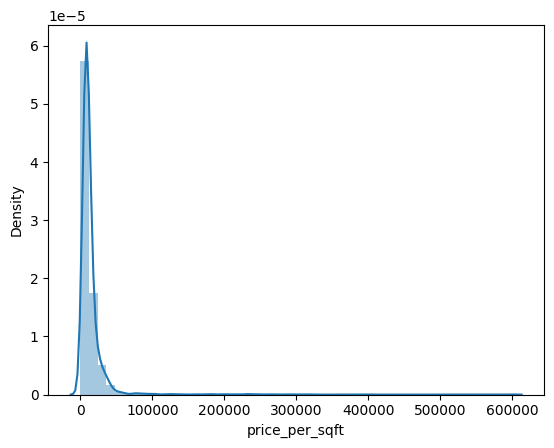

In [28]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

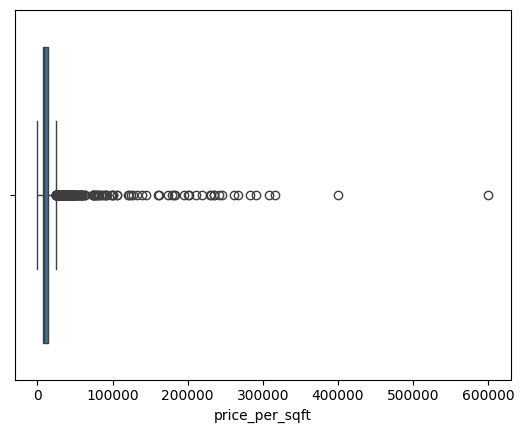

In [29]:
sns.boxplot(x=df['price_per_sqft'])

In [31]:
# calculate the iqr for price_per sqft columns
q1=df['price_per_sqft'].quantile(0.25)
q3= df['price_per_sqft'].quantile(0.75)
iqr= q3-q1
# define bounds for outliers
lower_bound= q1-1.5*iqr
upper_bound= q3+ 1.5* iqr
# identify outliers
outliers_sqft = df[(df['price_per_sqft']< lower_bound)|(df['price_per_sqft']>upper_bound)]

# displaying the number of outliers and  some stastics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()
num_outliers , outliers_sqft_stats

(371,
 count       371.000000
 mean      53737.811321
 std       60660.260648
 min       24489.000000
 25%       28249.500000
 50%       33951.000000
 75%       43899.500000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [32]:
outliers_sqft['area']= outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3916058555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']= outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [35]:
outliers_sqft['price_per_sqft']= round((outliers_sqft['price']*1000000)/outliers_sqft['area'])

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\2701874313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft']= round((outliers_sqft['price']*1000000)/outliers_sqft['area'])


In [36]:
outliers_sqft['price_per_sqft'].describe()

count     371.000000
mean     2862.700809
std      1271.662009
min       272.000000
25%      2500.000000
50%      2955.000000
75%      3544.000000
max      8254.000000
Name: price_per_sqft, dtype: float64

In [38]:
df.update(outliers_sqft)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

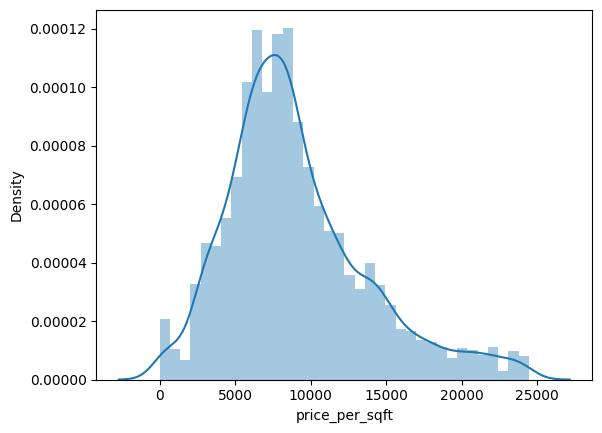

In [39]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

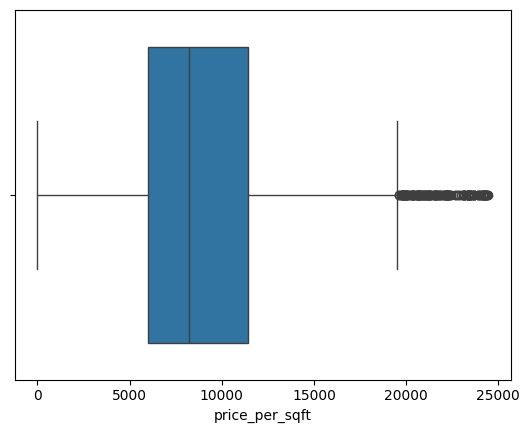

In [41]:
sns.boxplot(x=df['price_per_sqft'])

In [46]:
df[df['price_per_sqft']> 25000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score


In [47]:
df= df[df['price_per_sqft']<=25000]

<Axes: xlabel='price_per_sqft'>

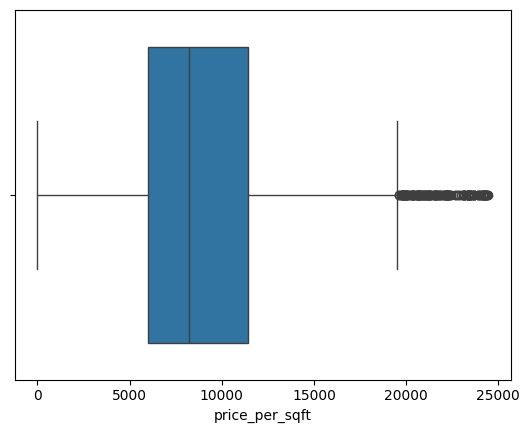

In [48]:
sns.boxplot(x=df['price_per_sqft'])

# area

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

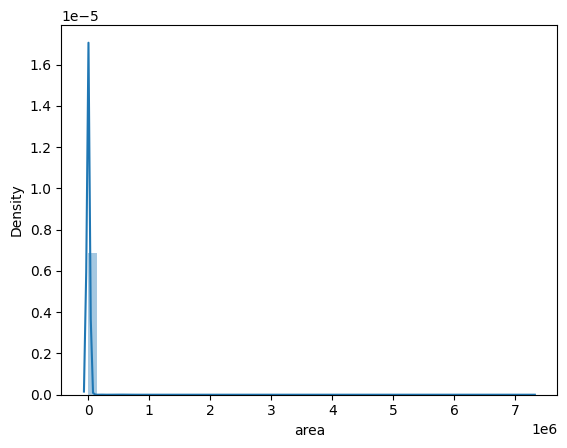

In [49]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

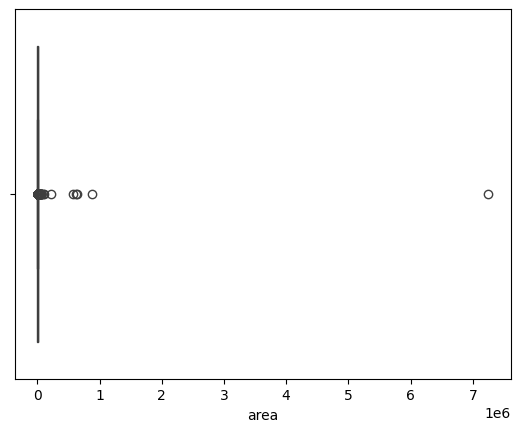

In [50]:
sns.boxplot(x=df['area'])

In [52]:
df['area'].describe()

count    3.813000e+03
mean     4.812811e+03
std      1.195410e+05
min      1.450000e+02
25%      1.245000e+03
50%      1.743000e+03
75%      2.343000e+03
max      7.250000e+06
Name: area, dtype: float64

In [53]:

df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
1701,flat,signature global solera 2,Sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,new property,NaN,NaN,514396.0,0,0,0,0,0,1,44
1711,flat,hcbs sports ville,Sohna,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
2042,house,independent,Pataudi Road,1.45,2.0,7250000.0,Plot area 200(809372 sq.m.),4,3,3+,3.0,South,Moderately Old,NaN,200.0,NaN,0,0,0,0,0,1,0
2196,flat,signature the roselia,Sector 95A,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,new property,NaN,NaN,569243.0,0,0,0,0,0,1,76
2756,flat,ramsons kshitij,Sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
3144,house,independent,Sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,new property,NaN,2.0,NaN,1,1,1,0,1,2,0


In [54]:

df = df[df['area'] < 100000]

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

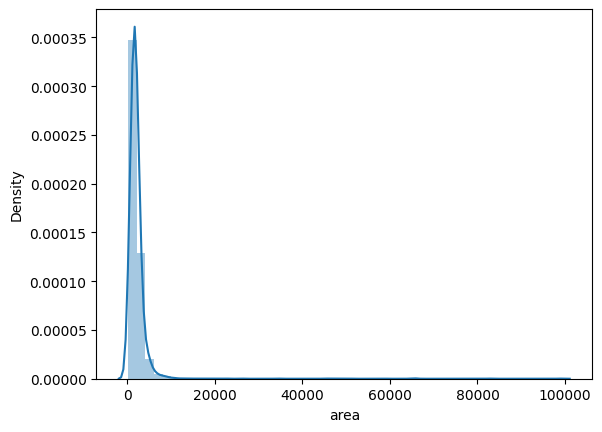

In [55]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

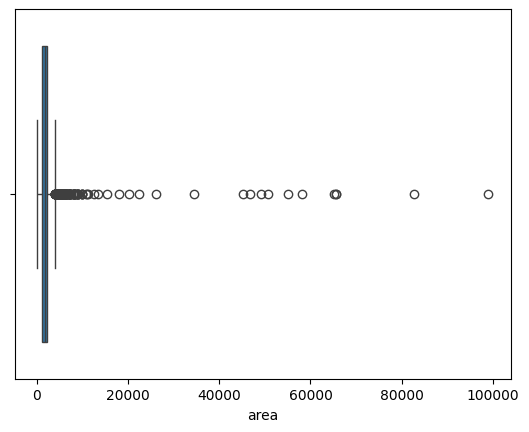

In [57]:
sns.boxplot(x=df['area'])

In [58]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# 853,1867,1166,2,2488,120,3729,2601,1527

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
853,house,independent,DLF Phase 1,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
50,house,ganpati heights apartment,Prem Nagar,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1867,flat,rof ananda,Sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,new property,NaN,NaN,64529.00,1,0,0,0,0,1,15
1166,flat,rof ananda,Sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
313,house,dlf city plot phase 4,DLF Phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
2,flat,pyramid elite,Sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
2448,flat,rof ananda,Sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
3272,house,independent,Mayfield Garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,3.0,North-East,Relatively New,NaN,8260.0,4860.00,0,0,1,0,0,2,49
120,flat,signature the serenas,Sohna,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
2772,house,independent,DLF Phase 2,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,0,1,0,2,109


In [61]:
df.drop(index=[853,1867,1166,2,2488,120,3729,2601,1527],inplace=True)

In [62]:
df[df['area']> 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
50,house,ganpati heights apartment,Prem Nagar,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
313,house,dlf city plot phase 4,DLF Phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
2448,flat,rof ananda,Sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
3272,house,independent,Mayfield Garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,3.0,North-East,Relatively New,NaN,8260.0,4860.00,0,0,1,0,0,2,49
2772,house,independent,DLF Phase 2,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,0,1,0,2,109
3792,flat,ramsons kshitij,Sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33
2050,house,independent,Ashok Vihar Phase I,1.45,557.0,26032.0,Plot area 26000(2415.48 sq.m.),4,4,2,2.0,East,Moderately Old,NaN,26000.0,NaN,0,1,1,0,0,1,62
1409,house,independent,Sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,new property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
3326,house,independent,Sushant Lok Phase 1,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,1,0,1,2,123
2216,flat,godrej air,Sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,1,0,1,2,44


In [63]:
df.loc[50,'area'] = 115*9
df.loc[313,'area'] = 7250
df.loc[2448,'area'] = 5800
df.loc[3272,'area'] = 2660
df.loc[2772,'area'] = 2850
df.loc[2216,'area'] = 1812
df.loc[3213,'area'] = 2160
df.loc[3582,'area'] = 1175

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

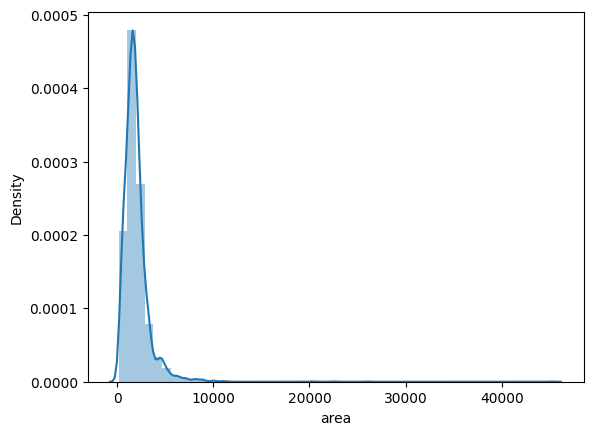

In [64]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

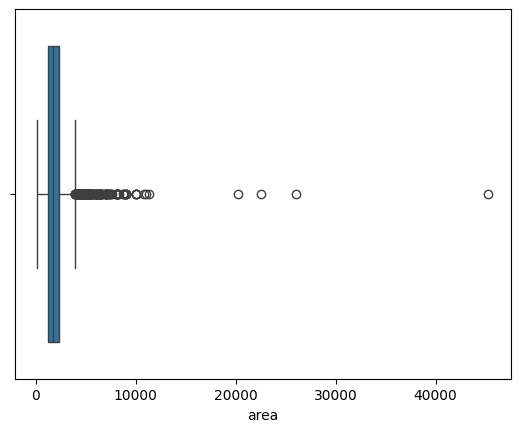

In [65]:

sns.boxplot(x=df['area'])

In [66]:
df['area'].describe()

count     3798.000000
mean      1967.126119
std       1527.166476
min        145.000000
25%       1244.250000
50%       1741.000000
75%       2325.000000
max      45283.000000
Name: area, dtype: float64

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

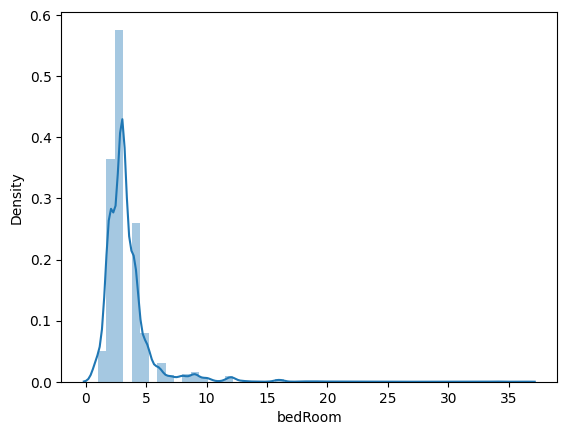

In [67]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

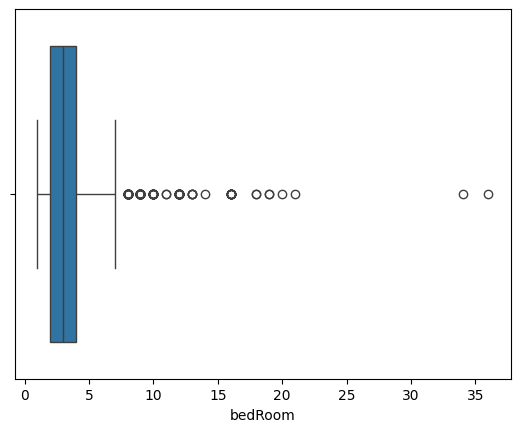

In [68]:
sns.boxplot(x=df['bedRoom'])

In [69]:
df['bedRoom'].describe()

count    3798.000000
mean        3.375461
std         2.017999
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

In [70]:

df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
3928,house,independent,West Rajiv Nagar,2.25,6944.0,3240.0,Plot area 360(301.01 sq.m.),36,36,2,3.0,East,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,1,7
2130,house,manohar nagar,Manohar Nagar,5.60,12444.0,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,34,34,3+,4.0,NaN,new property,NaN,500.0,NaN,0,0,0,0,0,2,0
3760,house,independent,Sector 54,5.00,4307.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,0,49
2715,house,independent,Sushant Lok Phase 1,4.50,3906.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,0,22
80,house,independent,Sector 17A,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,0,1,0,1,68
1551,house,independent,Sector 17A,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,1,74
20,house,independent,Suncity,5.50,3819.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0,70
1433,house,private house,Sector 55,7.05,4691.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,0,57
2222,house,independent,Sector 40,12.00,3899.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,new property,NaN,3078.0,NaN,1,1,1,1,0,2,0
1308,house,independent,DLF Phase 2,16.00,5926.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,new property,NaN,325.0,300.0,1,1,1,1,0,2,72


In [71]:
df = df[df['bedRoom'] <= 10]

In [72]:
df.shape

(3745, 23)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

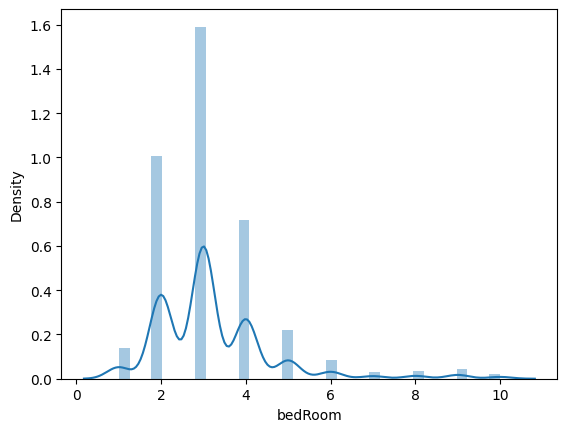

In [74]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

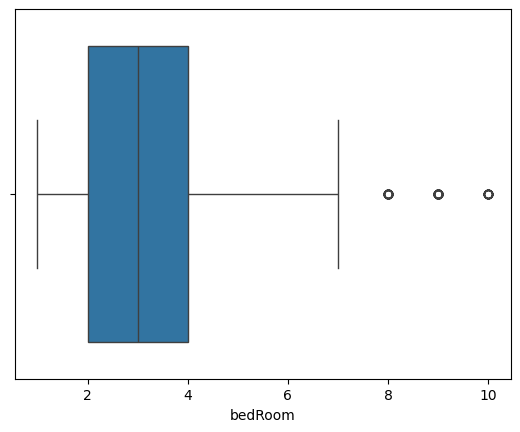

In [75]:
sns.boxplot(x=df['bedRoom'])

In [76]:
df['bedRoom'].describe()

count    3745.000000
mean        3.216822
std         1.415529
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

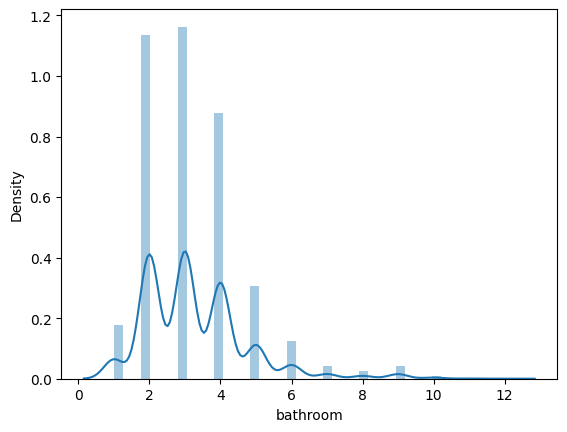

In [77]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

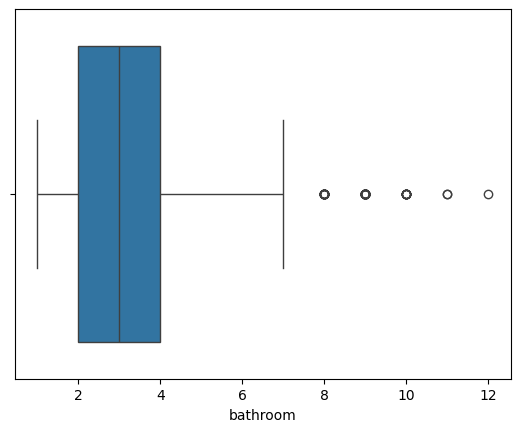

In [78]:
sns.boxplot(x=df['bathroom'])

In [79]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
3399,house,adani brahma samsara,Sector 60,18.02,2820.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
2883,house,independent,Sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,1,0,0,2,38
2930,house,independent,DLF Phase 3,11.00,2890.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,1,0,1,2,39


In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38
3,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
5,flat,suncity avenue,Sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159


C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

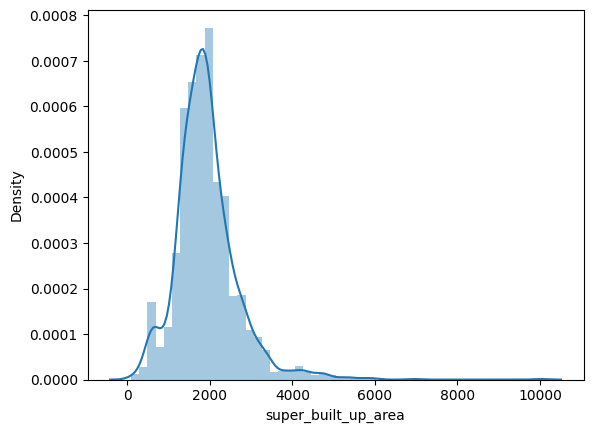

In [81]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

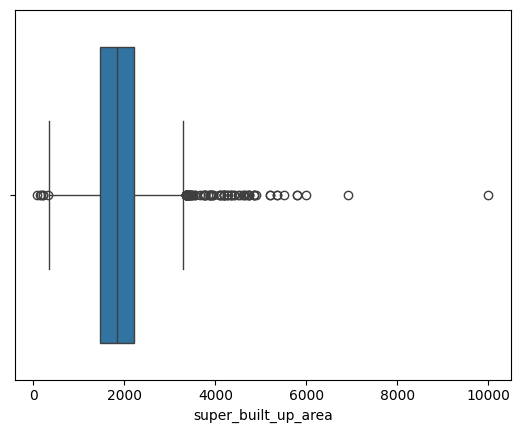

In [82]:
sns.boxplot(x=df['super_built_up_area'])

In [83]:
df['super_built_up_area'].describe()

count     1892.000000
mean      1920.772489
std        765.585628
min         89.000000
25%       1465.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [84]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
1374,flat,bestech park view grand spa,Sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140
3397,flat,krrish provence estate,Gwal Pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,1,0,1,1,49


C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

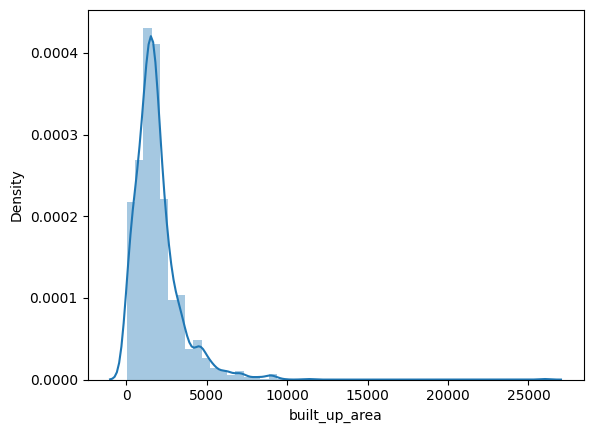

In [85]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

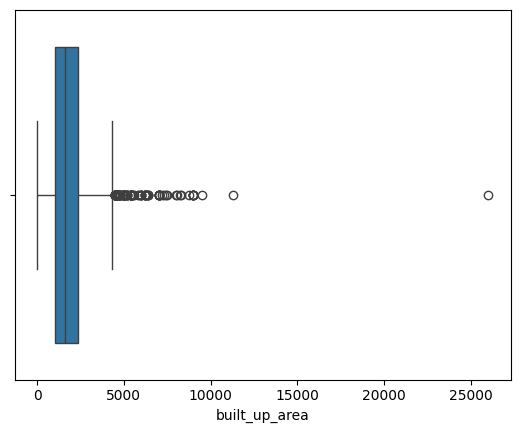

In [86]:
sns.boxplot(x=df['built_up_area'])

In [91]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
2050,house,independent,Ashok Vihar Phase I,1.45,557.0,26032.0,Plot area 26000(2415.48 sq.m.),4,4,2,2.0,East,Moderately Old,NaN,26000.0,NaN,0,1,1,0,0,1,62
2948,house,independent,Sushant Lok Phase 1,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,2,42


C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

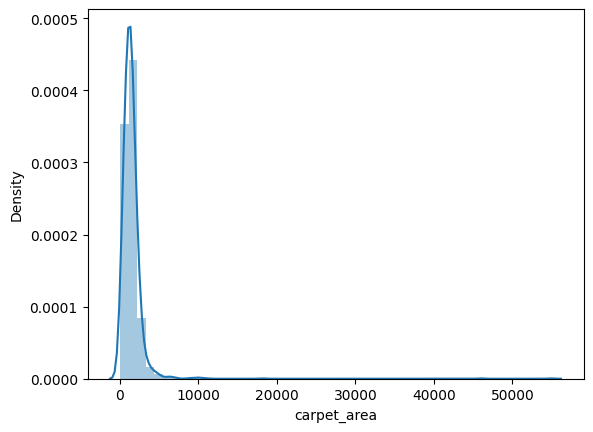

In [92]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

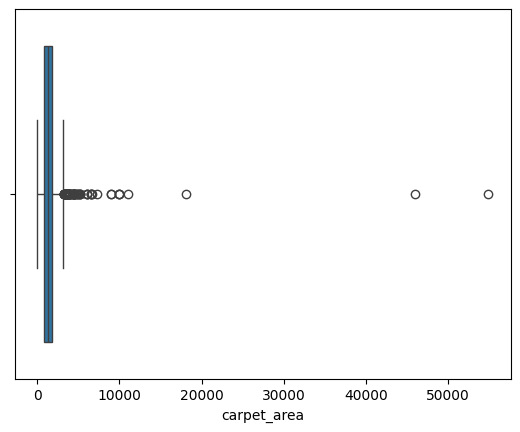

In [93]:
sns.boxplot(x=df['carpet_area'])

In [94]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
2216,flat,godrej air,Sector 85,2.50,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,1,0,1,2,44
2434,flat,m3m golfestate,Sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
2448,flat,rof ananda,Sector 95,0.33,60.0,5800.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,1,37
3792,flat,ramsons kshitij,Sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,1,33


In [96]:
df.loc[2216,'carpet_area'] = 1812

In [97]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
2434,flat,m3m golfestate,Sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
2448,flat,rof ananda,Sector 95,0.33,60.0,5800.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,1,37
3792,flat,ramsons kshitij,Sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,1,33


In [98]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38
3,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
5,flat,suncity avenue,Sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159


C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

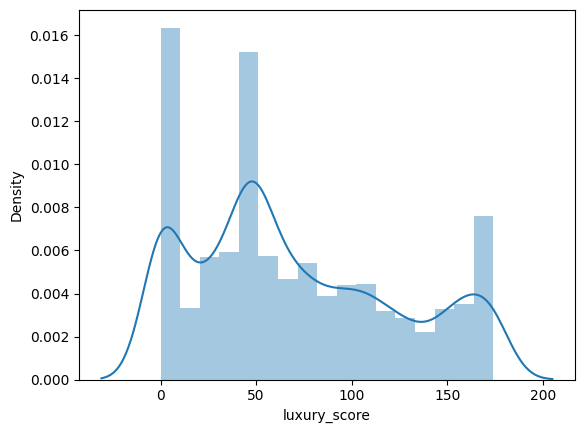

In [99]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

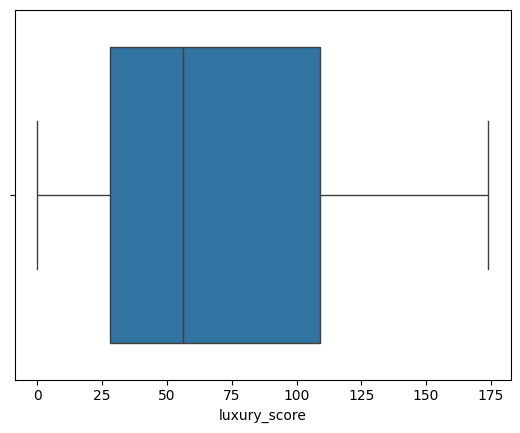

In [101]:
sns.boxplot(x=df['luxury_score'])

In [102]:
df.shape

(3745, 23)

In [103]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [104]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38
3,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
5,flat,suncity avenue,Sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159


C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

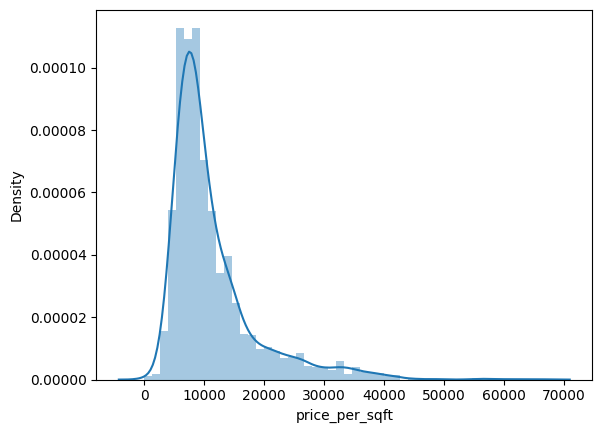

In [105]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

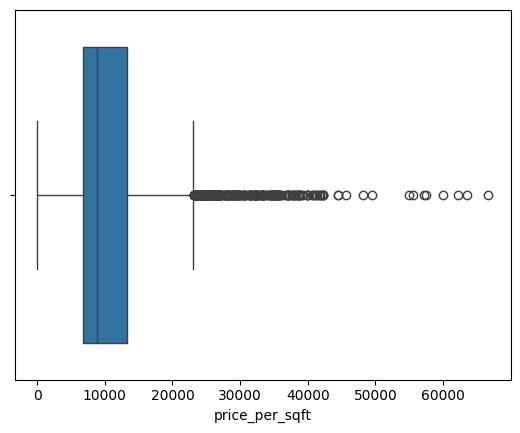

In [107]:
sns.boxplot(x=df['price_per_sqft'])

In [108]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
406,house,cloudnine cottages,Sohna Road,5.5,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
700,house,emaar mgf marbella,Sector 66,18.0,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,1,0,0,0,75
742,house,independent,DLF Phase 1,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,1,0,0,0,97
938,house,independent,DLF Phase 4,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
1133,house,independent,Rajendra Park,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,1,0
1400,flat,unitech vistas,Sector 70,9.0,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
1479,house,project housing board colony,Sector 31,8.0,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0
1568,house,independent,Sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,new property,NaN,115.0,100.0,0,0,0,0,1,2,44
1585,house,dlf city plots,DLF Phase 1,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
1703,house,emaar the palm springs,Sector 54,14.0,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160


In [110]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)
                                  

np.float64(169.70000000000002)

In [112]:
df[(df['area']/df['bedRoom'])<169]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
38,house,independent,Surat Nagar 1,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,2,7
50,house,ganpati heights apartment,Prem Nagar,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
96,house,independent,Rajendra Park,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0
103,house,independent,Laxman Vihar,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6,4,1,2.0,North,Undefined,NaN,990.0,NaN,0,0,0,0,0,1,0
197,house,independent,Rajiv Nagar,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10,7,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,house,independent,Surat Nagar Phase 2,0.30,6667.0,450.0,Plot area 50(4.65 sq.m.),6,3,3,3.0,South,Moderately Old,NaN,50.0,NaN,0,0,0,0,0,1,0
3833,house,independent,Subhash Nagar,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4,4,0,2.0,NaN,Undefined,NaN,675.0,NaN,0,0,0,0,0,1,0
3860,house,independent,South City 1,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1,1,0,0,0,2,36
3926,house,independent,Gandhi Nagar,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,50.0,NaN,0,0,0,0,0,1,0


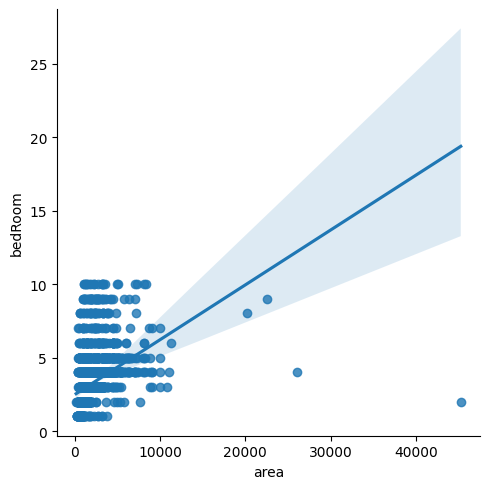

In [113]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [114]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [117]:
(df[df['area_room_ratio'] <250])['bedRoom'].value_counts()

bedRoom
2     53
3     35
5     33
4     26
6     22
9     19
8     13
10     9
7      9
Name: count, dtype: int64

In [118]:
df =df[df['area_room_ratio']>100]

In [120]:
outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom'] > 3)]

In [122]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [124]:
df.update(outliers_df)

C:\Users\Kishlay Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_22392\3159295313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 2. 2. ... 5. 1. 3.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.update(outliers_df)


In [125]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [126]:
df[(df['area_room_ratio'] <250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
96,house,independent,Rajendra Park,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,150.000000
407,house,independent,Maruti Kunj,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,1,0,166.666667
785,house,shivpuri,Shivpuri,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,1,0,1,2,0,225.000000
920,house,"om nagar, sector-11",Near Khandsa Road,0.60,8333.0,720.0,Plot area 720(66.89 sq.m.),inf,2,1,0.0,East,Old Property,NaN,720.0,NaN,0,0,0,0,1,1,7,0.000000
1149,house,independent,Ashok Vihar Phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,180.000000
1251,house,independent,Jyoti Park,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,1,0,198.000000
1818,house,independent,Subhash Nagar,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,1,0,0,1,8,200.000000
2014,house,independent,Sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1,0,1.0,NaN,new property,NaN,2250.0,NaN,0,0,0,0,0,1,0,225.000000
2017,house,independent,Manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8,0,1.0,NaN,new property,NaN,1782.0,NaN,0,0,0,0,0,1,0,222.750000
2884,house,independent,Sheetla Colony,1.65,8333.0,1980.0,Built Up area: 220 (20.44 sq.m.),9.0,9,0,1.0,NaN,new property,NaN,220.0,NaN,0,0,0,0,0,1,0,220.000000


In [127]:
df[(df['area_room_ratio'] <250) & (df['bedRoom']>4)].shape

(15, 24)

In [128]:
df.shape

(3721, 24)

In [129]:
df= df[~((df['area_room_ratio'] <250) & (df['bedRoom']>4))]

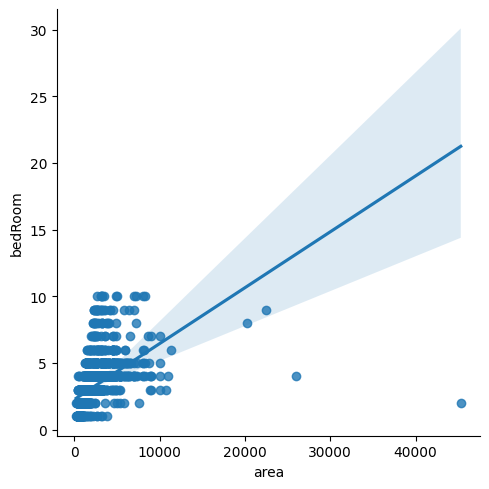

In [131]:
sns.lmplot(data=df, x='area',y='bedRoom')

In [132]:
df.shape

(3706, 24)

In [133]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
1,flat,smart world gems,Sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.500000
3,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49,292.500000
4,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174,665.000000
5,flat,suncity avenue,Sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159,266.000000


In [134]:
df.to_csv('gurgaon_properties_oulier_treatment.csv',index=False)